In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from src.paths import processed_data_path,repo_path

In [2]:
cfm_data_path = f'{repo_path}CFM_Lancaster/data/cfm_input/'
ds_path = f"{processed_data_path}stations_ds.nc"
ds = xr.open_dataset(ds_path)
stations = ds.station.data
variables = list(ds.keys())

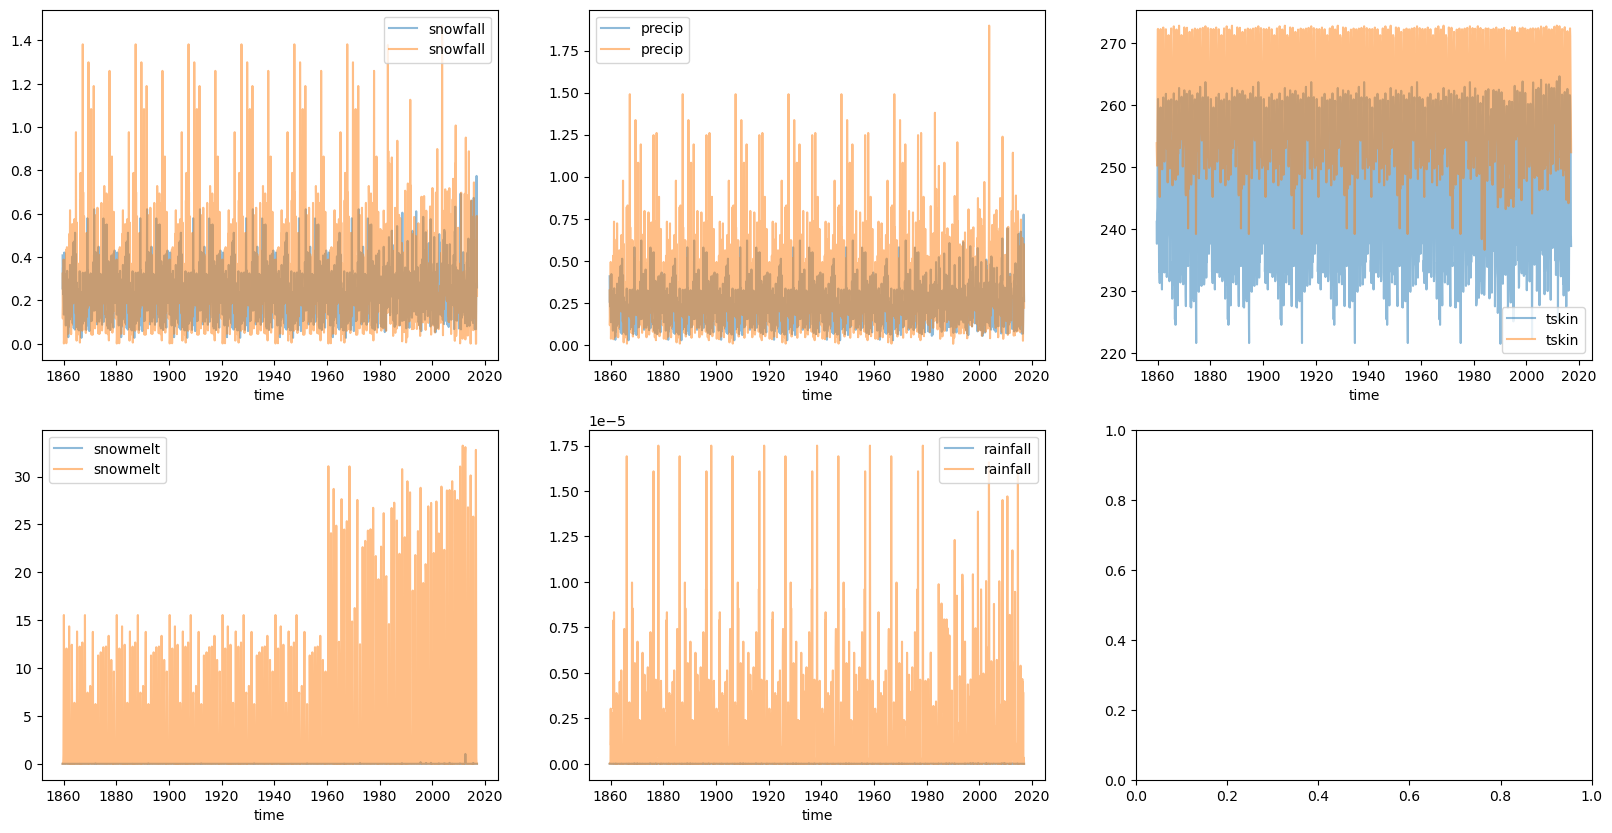

In [3]:
fig, subplots = plt.subplots(2, 3,figsize=(20,10))

stations = ['Summit','Kan-M']

for station in stations:
    for ax,variable in zip(subplots.flat,variables):
        df = pd.read_csv(f'{cfm_data_path}{station}_{variable}.csv').T
        df = df.reset_index()
        df.rename(columns = {"index":"time",0:f"{variable}"}, inplace = True)
        df = df.apply(pd.to_numeric) 
        df.plot(x='time',ax=ax,label=f'{variable}',alpha=0.5)


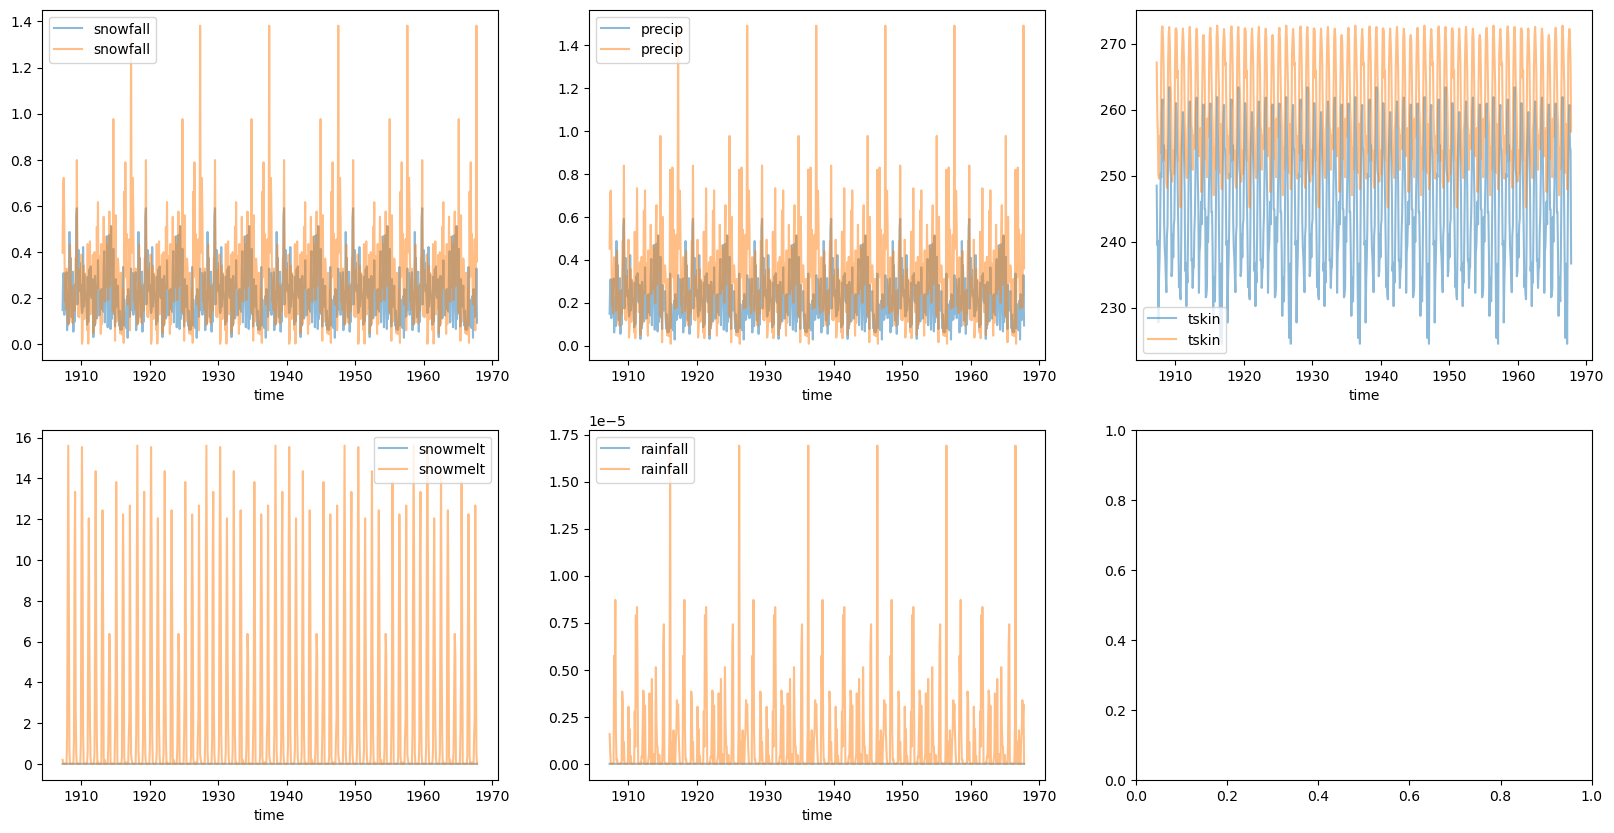

In [15]:
fig, subplots = plt.subplots(2, 3,figsize=(20,10))

stations = ['Summit','Kan-M']

for station in stations:
    for ax,variable in zip(subplots.flat,variables):
        df = pd.read_csv(f'{cfm_data_path}{station}_{variable}.csv').T
        df = df.reset_index()
        df.rename(columns = {"index":"time",0:f"{variable}"}, inplace = True)
        df = df.apply(pd.to_numeric) 
        df_spin = df[df.time < 1967.8]
        df_spin.plot(x='time',ax=ax,label=f'{variable}',alpha=0.5)

In [ ]:
fig, subplots = plt.subplots(2, 3,figsize=(20,10))

stations = ['Summit','Kan-M']

for station in stations:
    for ax,variable in zip(subplots.flat,variables):
        df = pd.read_csv(f'{cfm_data_path}{station}_{variable}.csv').T
        df = df.reset_index()
        df.rename(columns = {"index":"time",0:f"{variable}"}, inplace = True)
        df = df.apply(pd.to_numeric) 
        df_spin = df[df.time < 1967.8]
        df_spin.plot(x='time',ax=ax,label=f'{variable}',alpha=0.5)

In [ ]:
df_spin = df[df.time < 1980]

In [10]:
df[df.time>2001]

,time,rainfall
1307,2001.038320,0.000002
1308,2001.121650,0.000002
1309,2001.204980,0.000002
1310,2001.288305,0.000002
1311,2001.371637,0.000002
1312,2001.454980,0.000002
1313,2001.538322,0.000002
1314,2001.621664,0.000002
1315,2001.705005,0.000002
1316,2001.788346,0.000002


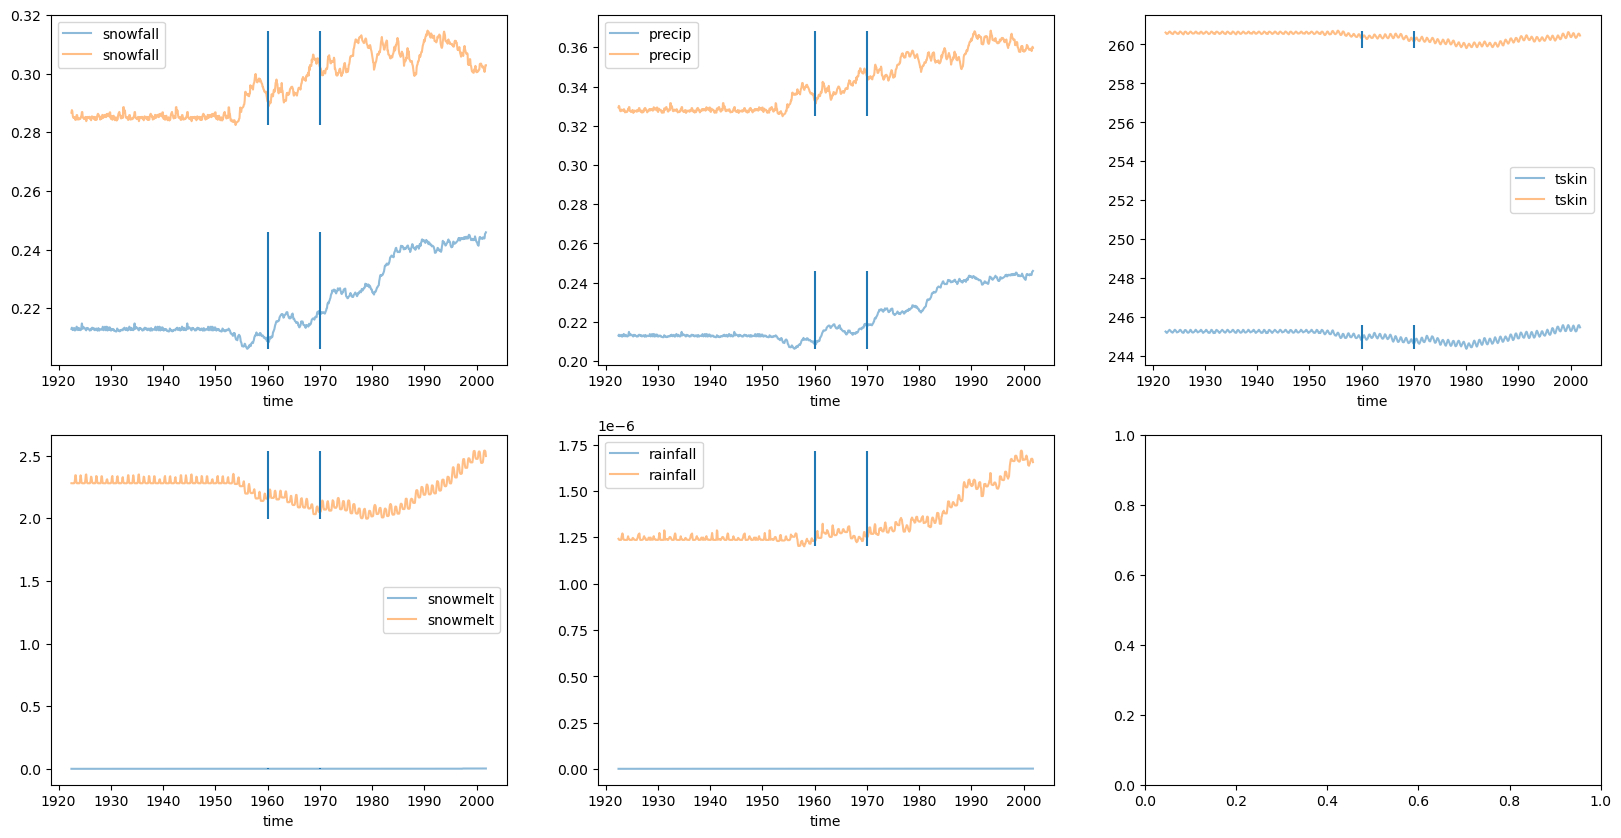

In [6]:
fig, subplots = plt.subplots(2, 3,figsize=(20,10))

stations = ['Summit','Kan-M']

for station in stations:
    for ax,variable in zip(subplots.flat,variables):
        df = pd.read_csv(f'{cfm_data_path}{station}_{variable}.csv').T
        df = df.reset_index()
        df.rename(columns = {"index":"time",0:f"{variable}"}, inplace = True)
        df = df.apply(pd.to_numeric) 
        df = df.rolling(window=365*1).mean()
        df.plot(x='time',ax=ax,label=f'{variable}',alpha=0.5)
        ax.vlines(1960, df.min().values[1], df.max().values[1])
        ax.vlines(1970, df.min().values[1], df.max().values[1])